In [108]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [109]:
import numpy as np
import pandas as pd
import seaborn as sns

In [110]:
adp = pd.read_csv("/content/drive/MyDrive/ml project/Admission_Predict.csv")
adp.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [111]:
adp.drop(['Serial No.'], axis = 1, inplace = True)

In [112]:
adp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          400 non-null    int64  
 1   TOEFL Score        400 non-null    int64  
 2   University Rating  400 non-null    int64  
 3   SOP                400 non-null    float64
 4   LOR                400 non-null    float64
 5   CGPA               400 non-null    float64
 6   Research           400 non-null    int64  
 7   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 25.1 KB


OUTLIERS TREATMENT

In [113]:
import matplotlib.pyplot as plt

In [114]:
sns.set(rc={'figure.figsize':(12,9)})

Outliers Treatment in GRE Score

In [115]:
adp['GRE Score'].describe()

count    400.000000
mean     316.807500
std       11.473646
min      290.000000
25%      308.000000
50%      317.000000
75%      325.000000
max      340.000000
Name: GRE Score, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


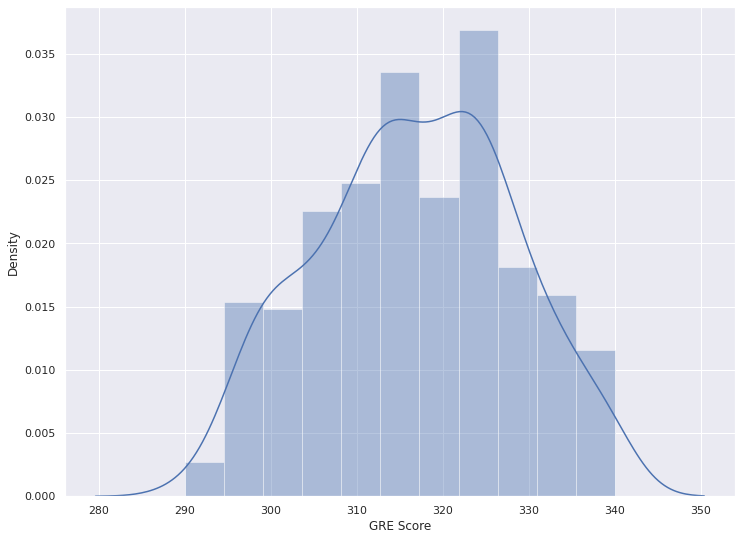

In [116]:
sns.distplot(adp['GRE Score'])

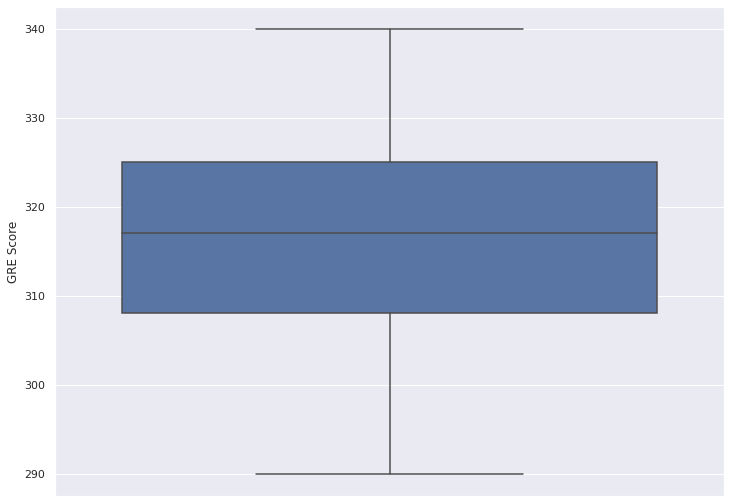

In [117]:
sns.boxplot(y=adp['GRE Score'])

Outliers Treatment in TOEFL Score

In [118]:
adp['TOEFL Score'].describe()

count    400.000000
mean     107.410000
std        6.069514
min       92.000000
25%      103.000000
50%      107.000000
75%      112.000000
max      120.000000
Name: TOEFL Score, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


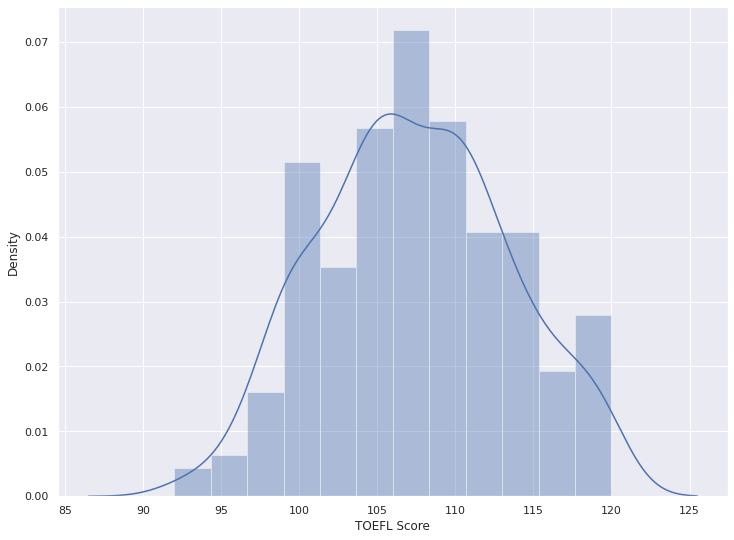

In [119]:
sns.distplot(adp['TOEFL Score'])

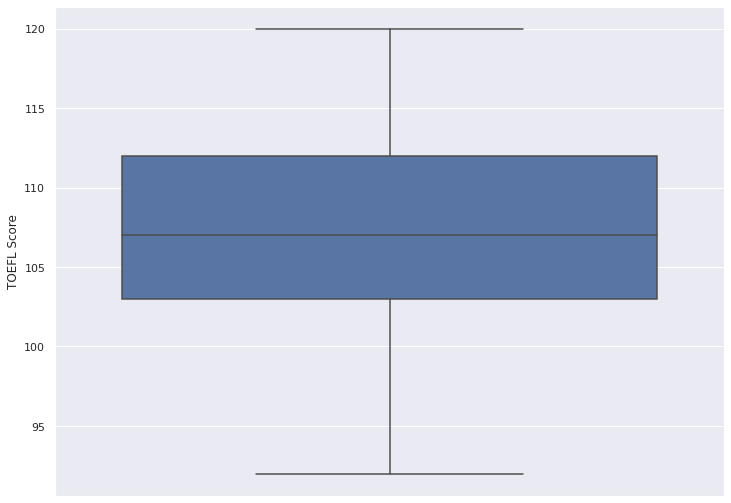

In [120]:
sns.boxplot(y=adp['TOEFL Score'])

Outliers Treatment in University Rating

In [121]:
adp['University Rating'].describe()

count    400.000000
mean       3.087500
std        1.143728
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: University Rating, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


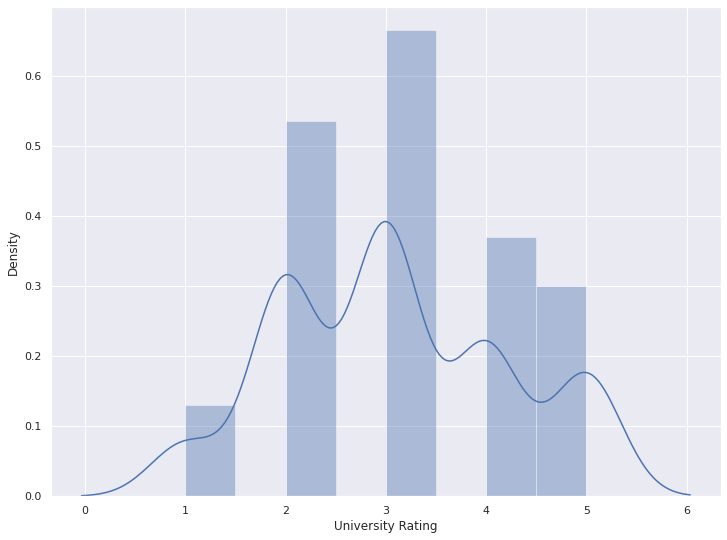

In [122]:
sns.distplot(adp['University Rating'])

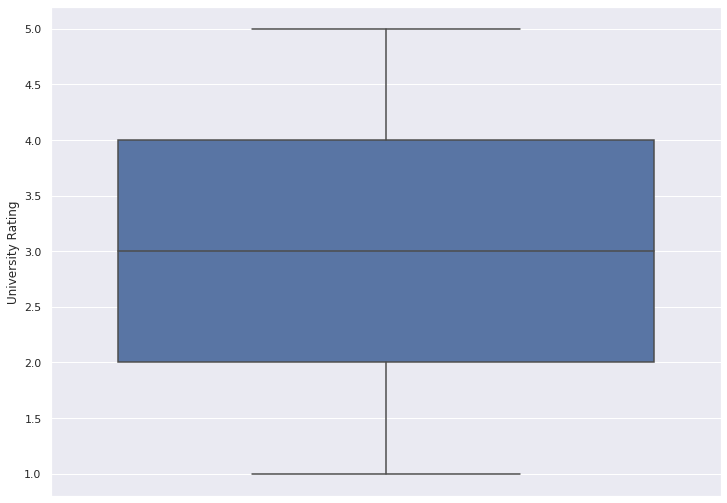

In [123]:
sns.boxplot(y=adp['University Rating'])

Outliers Treatment in SOP:

In [124]:
adp['SOP'].describe()

count    400.000000
mean       3.400000
std        1.006869
min        1.000000
25%        2.500000
50%        3.500000
75%        4.000000
max        5.000000
Name: SOP, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


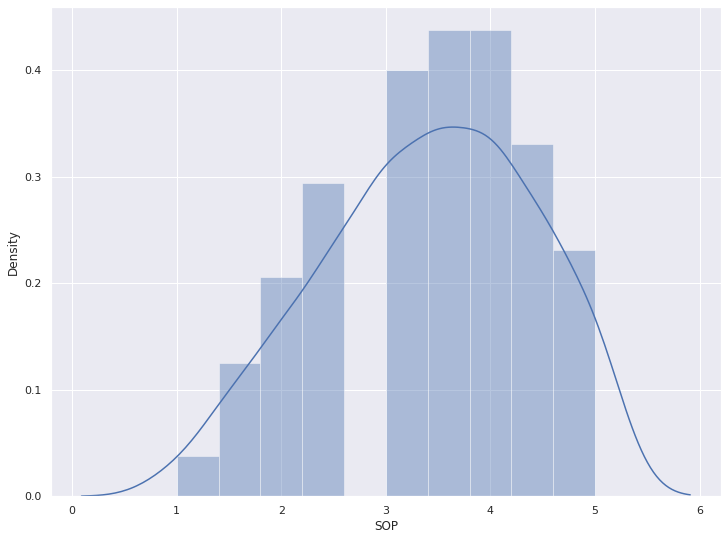

In [125]:
sns.distplot(adp['SOP'])

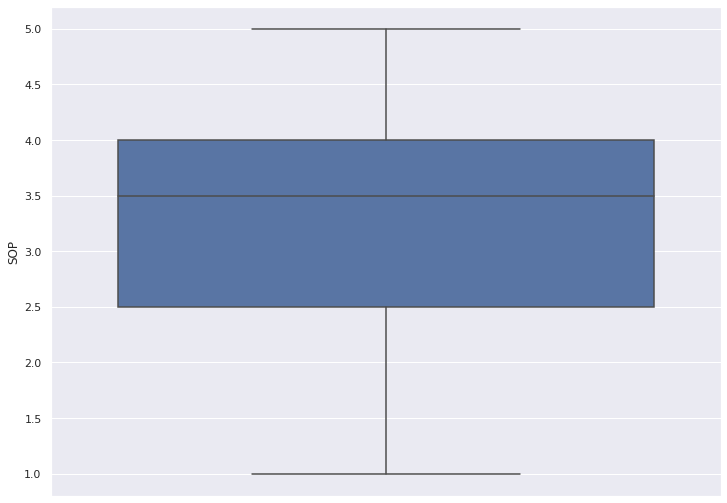

In [126]:
sns.boxplot(y=adp['SOP'])

Outliers Treatment in LOR:

In [127]:
adp['LOR '].describe()

count    400.000000
mean       3.452500
std        0.898478
min        1.000000
25%        3.000000
50%        3.500000
75%        4.000000
max        5.000000
Name: LOR , dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


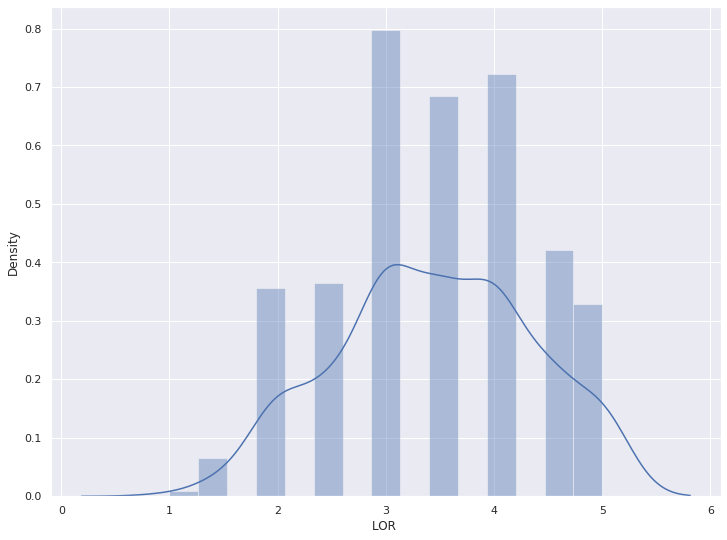

In [128]:
sns.distplot(adp['LOR '])

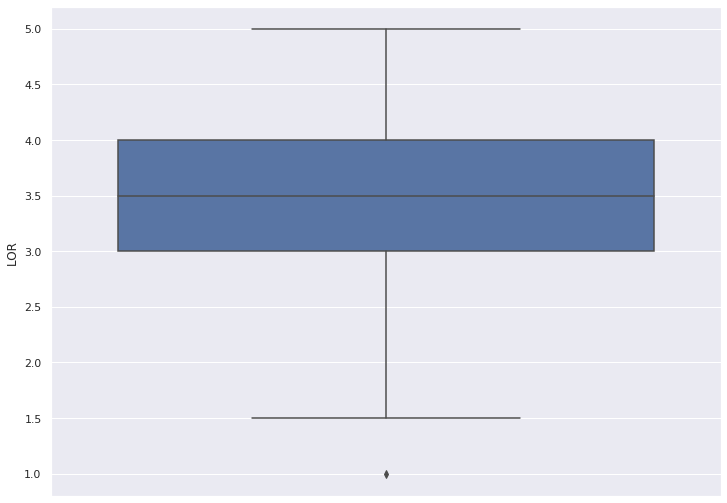

In [129]:
sns.boxplot(y=adp['LOR '])

Capping technique for removing outliers

In [130]:
percentile25 = adp['LOR '].quantile(0.25)
percentile75 = adp['LOR '].quantile(0.75)
iqr = percentile75 - percentile25
iqr

1.0

In [131]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print("Upper limit",upper_limit)
print("Lower limit",lower_limit)

Upper limit 5.5
Lower limit 1.5


In [132]:
adp['LOR '] = np.where(
    adp['LOR '] > upper_limit,
    upper_limit,
    np.where(
        adp['LOR '] < lower_limit,
        lower_limit,
        adp['LOR ']
    )
)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


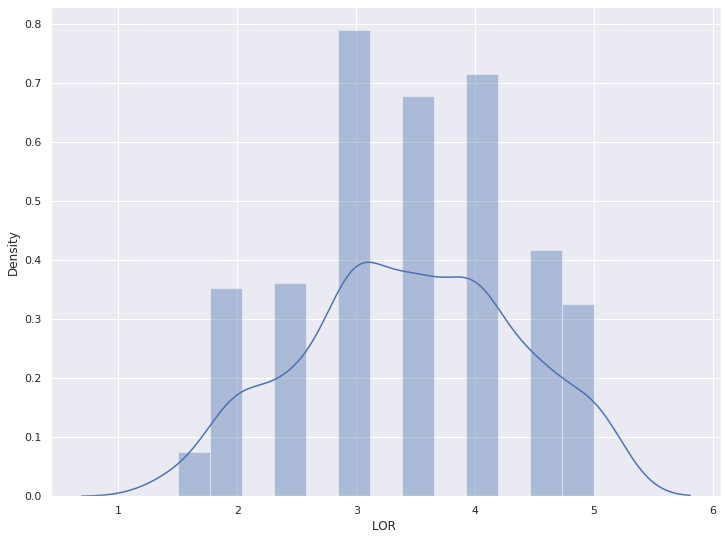

In [133]:
sns.distplot(adp['LOR '])

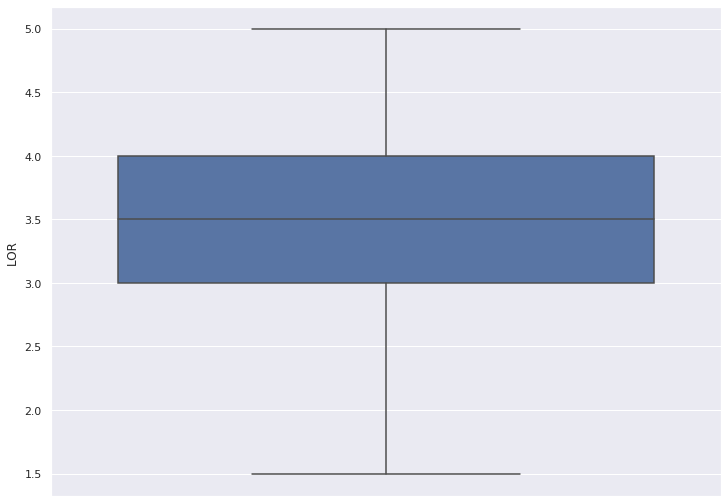

In [134]:
sns.boxplot(y=adp['LOR '])

Outliers Treatment in CGPA:

In [135]:
adp['CGPA'].describe()

count    400.000000
mean       8.598925
std        0.596317
min        6.800000
25%        8.170000
50%        8.610000
75%        9.062500
max        9.920000
Name: CGPA, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


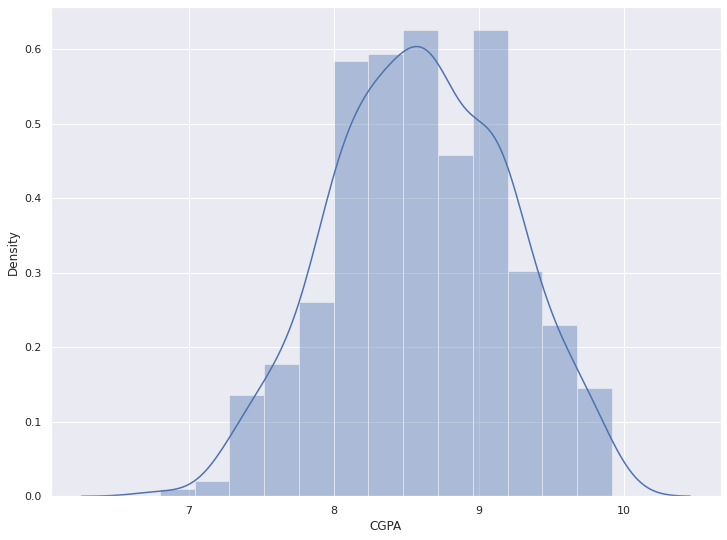

In [136]:
sns.distplot(adp['CGPA'])

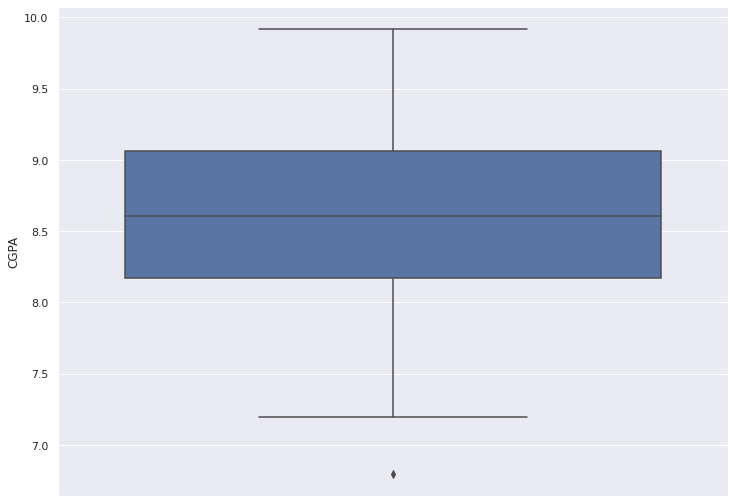

In [137]:
sns.boxplot(y=adp['CGPA'])

In [138]:
percentile25 = adp['CGPA'].quantile(0.25)
percentile75 = adp['CGPA'].quantile(0.75)
iqr = percentile75 - percentile25
iqr

0.8925000000000001

In [139]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print("Upper limit",upper_limit)
print("Lower limit",lower_limit)

Upper limit 10.401250000000001
Lower limit 6.83125


In [140]:
adp['CGPA'] = np.where(
    adp['CGPA'] > upper_limit,
    upper_limit,
    np.where(
        adp['CGPA'] < lower_limit,
        lower_limit,
        adp['CGPA']
    )
)

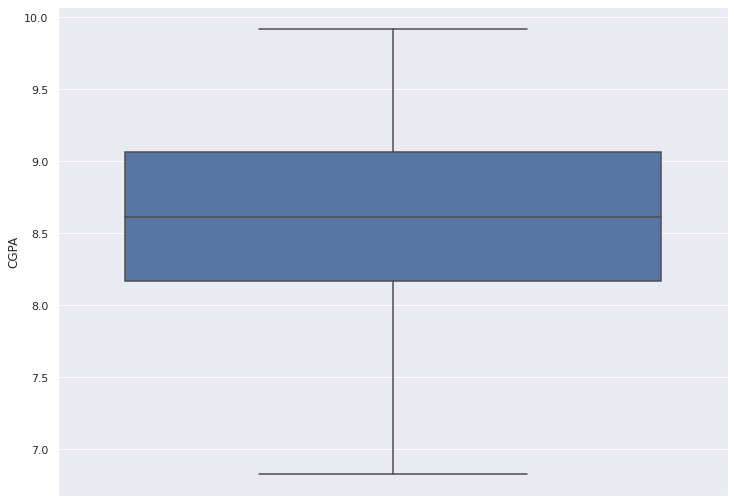

In [141]:
sns.boxplot(y=adp['CGPA'])

Outliers Treatment in Research:

In [142]:
adp['Research'].describe()

count    400.000000
mean       0.547500
std        0.498362
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: Research, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


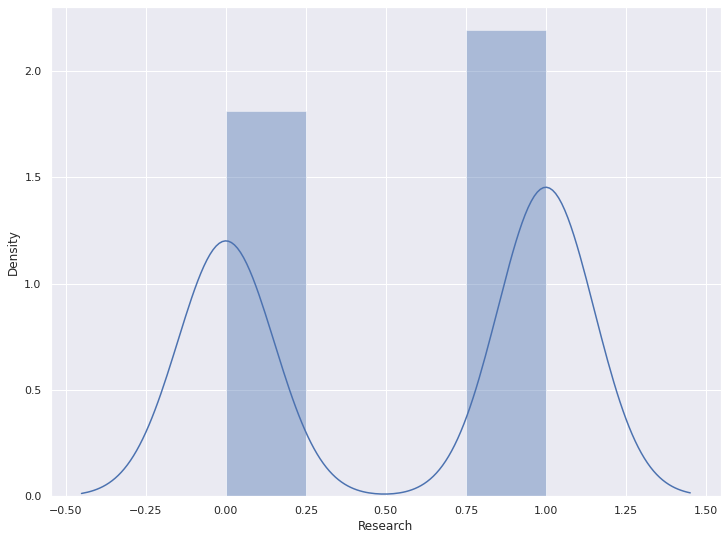

In [143]:
sns.distplot(adp['Research'])

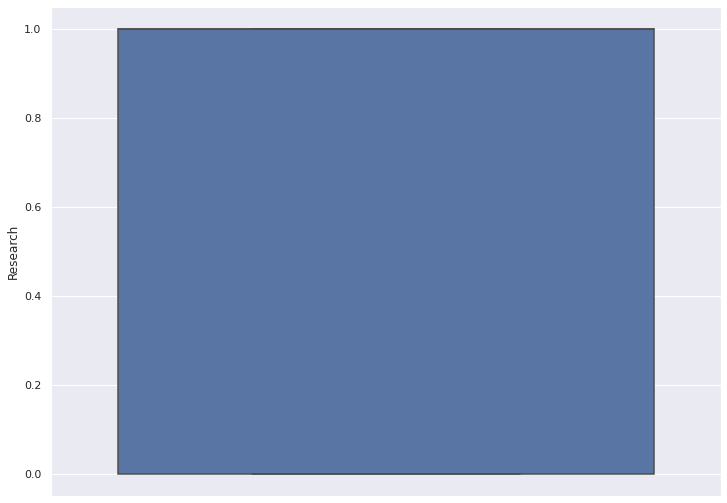

In [144]:
sns.boxplot(y=adp['Research'])

Outliers Treatment in Chance of Admit:

In [145]:
adp['Chance of Admit '].describe()

count    400.000000
mean       0.724350
std        0.142609
min        0.340000
25%        0.640000
50%        0.730000
75%        0.830000
max        0.970000
Name: Chance of Admit , dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


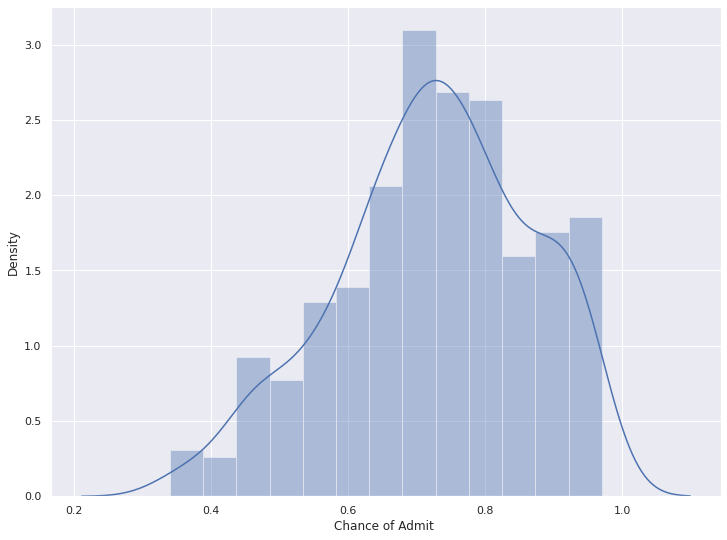

In [146]:
sns.distplot(adp['Chance of Admit '])

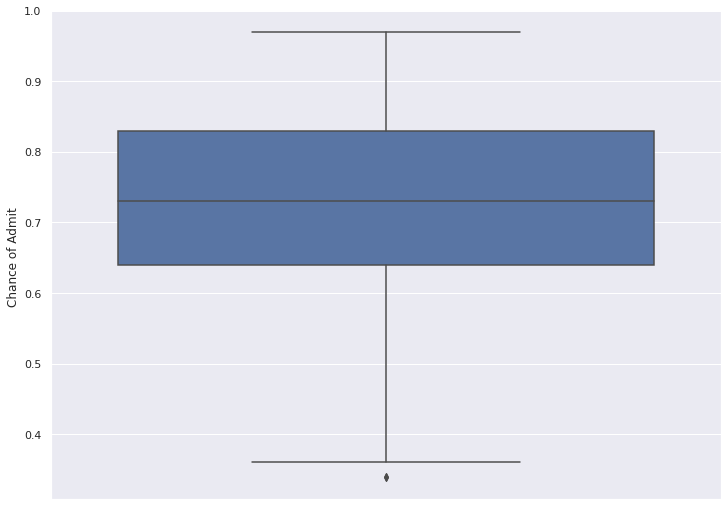

In [147]:
sns.boxplot(y=adp['Chance of Admit '])

In [148]:
percentile25 = adp['Chance of Admit '].quantile(0.25)
percentile75 = adp['Chance of Admit '].quantile(0.75)
iqr = percentile75 - percentile25
iqr

0.18999999999999995

In [149]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print("Upper limit",upper_limit)
print("Lower limit",lower_limit)

Upper limit 1.1149999999999998
Lower limit 0.3550000000000001


In [150]:
adp['Chance of Admit '] = np.where(
    adp['Chance of Admit '] > upper_limit,
    upper_limit,
    np.where(
        adp['Chance of Admit '] < lower_limit,
        lower_limit,
        adp['Chance of Admit ']
    )
)

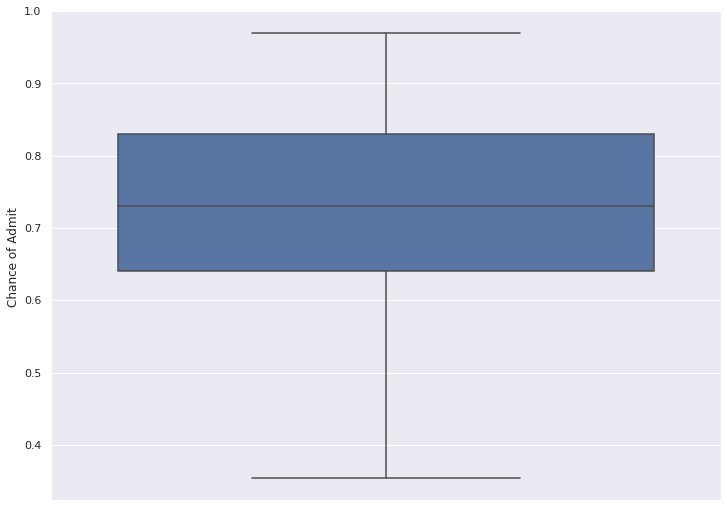

In [151]:
sns.boxplot(y=adp['Chance of Admit '])

Treatment Missing Values:

In [152]:
adp.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

No missing values in given dataset

In [153]:
adp

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1,0.82
396,325,107,3,3.0,3.5,9.11,1,0.84
397,330,116,4,5.0,4.5,9.45,1,0.91
398,312,103,3,3.5,4.0,8.78,0,0.67


In [154]:
adp1=adp.copy(deep=True)
adp1

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1,0.82
396,325,107,3,3.0,3.5,9.11,1,0.84
397,330,116,4,5.0,4.5,9.45,1,0.91
398,312,103,3,3.5,4.0,8.78,0,0.67


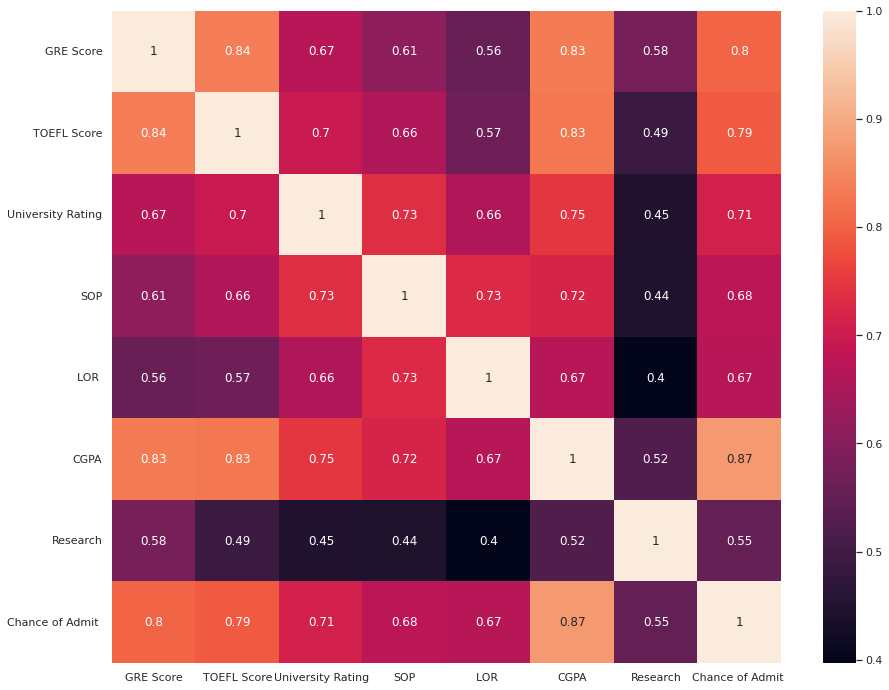

In [155]:
sns.set(rc={'figure.figsize':(15,12)})
sns.heatmap(adp1.corr(), annot=True)

In [156]:
sns.set(rc={'figure.figsize':(12,9)})

In [157]:
adp1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          400 non-null    int64  
 1   TOEFL Score        400 non-null    int64  
 2   University Rating  400 non-null    int64  
 3   SOP                400 non-null    float64
 4   LOR                400 non-null    float64
 5   CGPA               400 non-null    float64
 6   Research           400 non-null    int64  
 7   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 25.1 KB


Feature Scaling(NORMALIZATION):

In [158]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()


num_vars = ['GRE Score','TOEFL Score','University Rating','SOP','LOR ','CGPA','Research','Chance of Admit ']
adp1[num_vars] = scaler.fit_transform(adp1[num_vars])

adp1

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,0.94,0.928571,0.75,0.875,0.857143,0.912586,1.0,0.918699
1,0.68,0.535714,0.75,0.750,0.857143,0.660057,1.0,0.658537
2,0.52,0.428571,0.50,0.500,0.571429,0.378389,1.0,0.593496
3,0.64,0.642857,0.50,0.625,0.285714,0.595306,1.0,0.723577
4,0.48,0.392857,0.25,0.250,0.428571,0.446378,0.0,0.479675
...,...,...,...,...,...,...,...,...
395,0.68,0.642857,0.50,0.625,0.571429,0.715095,1.0,0.756098
396,0.70,0.535714,0.50,0.500,0.571429,0.737758,1.0,0.788618
397,0.80,0.857143,0.75,1.000,0.857143,0.847835,1.0,0.902439
398,0.44,0.392857,0.50,0.625,0.714286,0.630919,0.0,0.512195


**MULTIPLE LINEAR REGRESSION :**

In [159]:
from sklearn.model_selection import train_test_split
mdf_train, mdf_test = train_test_split(adp1, train_size = 0.8, test_size = 0.2, random_state = 100)

In [160]:
my_train = mdf_train.pop('Chance of Admit ')
mX_train = mdf_train
my_test = mdf_test.pop('Chance of Admit ')
mX_test = mdf_test

In [161]:
from sklearn.linear_model import LinearRegression
mregressor = LinearRegression()
mregressor.fit(mX_train, my_train)

LinearRegression()

In [162]:
m = mregressor.coef_
c = mregressor.intercept_,
print("Estimated model weights, m:" , m)
print("Estimated model intercept, c:" , c)

Estimated model weights, m: [ 0.11801853  0.15210321  0.03170211 -0.04534802  0.14203708  0.63572391
  0.03966741]
Estimated model intercept, c: (-0.003731303313669776,)


In [163]:
my_pred_test =  mregressor.predict(mX_test)
my_pred_train =  mregressor.predict(mX_train)

In [164]:
import math
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import mean_absolute_error

In [165]:
#Training Accuracies
mrmse = math.sqrt(mean_squared_error(my_train, my_pred_train)) 
print('Root mean square error', mrmse) 
mmse = (mean_squared_error(my_train, my_pred_train)) 
print('Mean square error', mmse) 
mmae=mean_absolute_error(my_train, my_pred_train)
print('Mean absolute error', mmae)

Root mean square error 0.10321040155389838
Mean square error 0.010652386988916948
Mean absolute error 0.0733299658641207


In [166]:
#Testing Accuracies
mrmse = math.sqrt(mean_squared_error(my_test, my_pred_test)) 
print('Root mean square error', mrmse) 
mmse = (mean_squared_error(my_test, my_pred_test)) 
print('Mean square error', mmse) 
mmae=mean_absolute_error(my_test, my_pred_test)
print('Mean absolute error', mmae)

Root mean square error 0.10011493705423982
Mean square error 0.0100230006213744
Mean absolute error 0.07795206763103124


Residual plot (plot between predected values and difference between actualvalues and predicted values) for test data

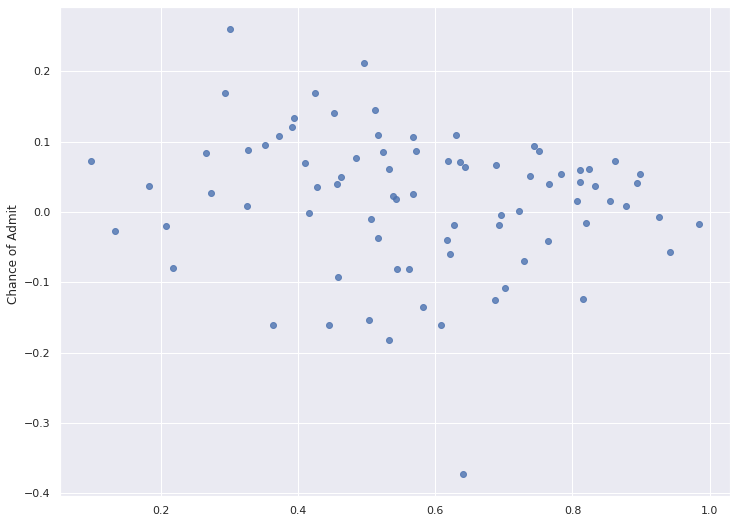

In [167]:
multipletest_residuals=my_test-my_pred_test
sns.regplot(x=my_pred_test,y=multipletest_residuals,scatter=True,fit_reg=False)

In [168]:
multipletest_residuals.describe().round(3)

count    80.000
mean      0.016
std       0.099
min      -0.373
25%      -0.030
50%       0.036
75%       0.074
max       0.260
Name: Chance of Admit , dtype: float64

Residual plot (plot between predected values and difference between actualvalues and predicted values) for train data

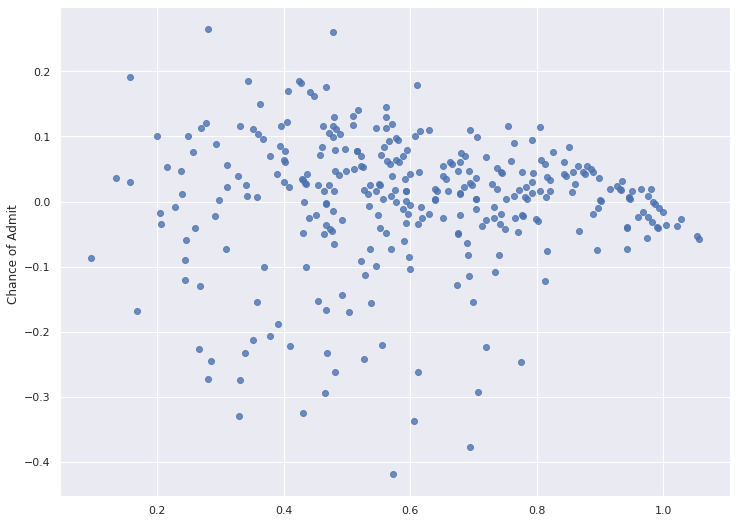

In [169]:
multipletrain_residuals=my_train-my_pred_train
sns.regplot(x=my_pred_train,y=multipletrain_residuals,scatter=True,fit_reg=False)

In [170]:
multipletrain_residuals.describe().round(3)

count    320.000
mean      -0.000
std        0.103
min       -0.419
25%       -0.036
50%        0.016
75%        0.058
max        0.265
Name: Chance of Admit , dtype: float64

In [171]:
import pickle
# Save the model
filename = 'modelmultipleRegressionf.pkl'
pickle.dump(mregressor, open(filename, 'wb'))

**DECISION TREE:**

In [172]:
from sklearn.model_selection import train_test_split
ddf_train, ddf_test = train_test_split(adp1, train_size = 0.8, test_size = 0.2, random_state = 100)

In [173]:
# Dividing the training data set into X and Y
dy_train = ddf_train.pop('Chance of Admit ')
dX_train = ddf_train
dy_test = ddf_test.pop('Chance of Admit ')
dX_test = ddf_test

In [174]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.tree import plot_tree # tree diagram
decisionregressor = DecisionTreeRegressor()
decisionregressor.fit(dX_train, dy_train)

DecisionTreeRegressor()

In [175]:
dy_pred_test = decisionregressor.predict(dX_test)
ddf = pd.DataFrame({'Real Values':dy_test, 'Predicted Values':dy_pred_test})
ddf

,Real Values,Predicted Values
248,0.723577,0.756098
318,0.707317,0.642276
173,0.869919,0.918699
285,0.934959,0.886179
184,0.593496,0.414634
...,...,...
358,0.560976,0.219512
166,0.479675,0.691057
198,0.560976,0.626016
267,0.609756,0.463415


In [176]:
dy_pred_train = decisionregressor.predict(dX_train)
ddf = pd.DataFrame({'Real Values':dy_train, 'Predicted Values':dy_pred_train})
ddf

,Real Values,Predicted Values
190,0.886179,0.886179
46,0.821138,0.821138
50,0.658537,0.658537
377,0.186992,0.186992
121,0.951220,0.951220
...,...,...
343,0.382114,0.382114
359,0.739837,0.739837
323,0.430894,0.430894
280,0.528455,0.528455


In [177]:
import math
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import mean_absolute_error

In [178]:
#Training Accuracies
drmse = math.sqrt(mean_squared_error(dy_train, dy_pred_train)) 
print('Root mean square error', drmse) 
dmse = (mean_squared_error(dy_train, dy_pred_train)) 
print('Mean square error', dmse) 
dmae=mean_absolute_error(dy_train, dy_pred_train)
print('Mean absolute error', dmae)

Root mean square error 1.3877787807814457e-17
Mean square error 1.925929944387236e-34
Mean absolute error 1.734723475976807e-18


In [179]:
#Test Accuracies
drmse = math.sqrt(mean_squared_error(dy_test, dy_pred_test)) 
print('Root mean square error', drmse) 
dmse = (mean_squared_error(dy_test, dy_pred_test)) 
print('Mean square error', dmse) 
dmae=mean_absolute_error(dy_test, dy_pred_test)
print('Mean absolute error', dmae)

Root mean square error 0.16612792164689588
Mean square error 0.027598486350717176
Mean absolute error 0.12306910569105693


Residual plot (plot between predected values and difference between actualvalues and predicted values) for test data

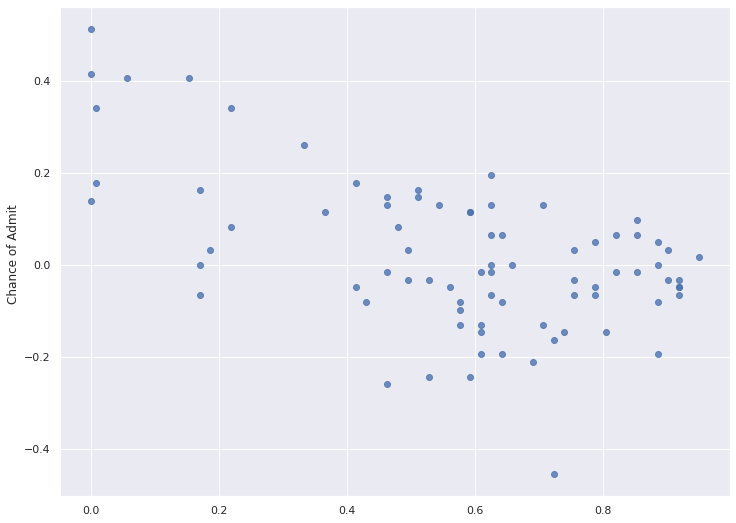

In [180]:
decisiontest_residuals=dy_test-dy_pred_test
sns.regplot(x=dy_pred_test,y=decisiontest_residuals,scatter=True,fit_reg=False)

In [181]:
decisiontest_residuals.describe()

count    80.000000
mean      0.017378
std       0.166259
min      -0.455285
25%      -0.069106
50%      -0.008130
75%       0.113821
max       0.512195
Name: Chance of Admit , dtype: float64

Residual plot (plot between predected values and difference between actualvalues and predicted values) for train data

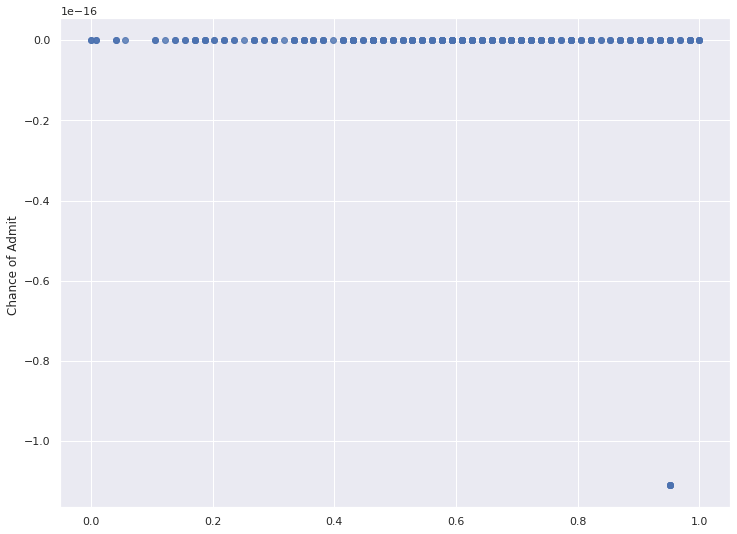

In [182]:
decisiontrain_residuals=dy_train-dy_pred_train
sns.regplot(x=dy_pred_train,y=decisiontrain_residuals,scatter=True,fit_reg=False)

In [183]:
decisiontrain_residuals.describe().round(3)

count    320.0
mean      -0.0
std        0.0
min       -0.0
25%        0.0
50%        0.0
75%        0.0
max        0.0
Name: Chance of Admit , dtype: float64

In [184]:
import pickle
# Save the model
filename = 'modeldecisiontreesf.pkl'
pickle.dump(decisionregressor, open(filename, 'wb'))

**Random Forest Model**

In [185]:
from sklearn.model_selection import train_test_split
r_train, r_test = train_test_split(adp1, train_size = 0.8, test_size = 0.2, random_state = 100)

In [186]:
# Dividing the training data set into X and Y
ry_train = r_train.pop('Chance of Admit ')
rX_train = r_train
ry_test = r_test.pop('Chance of Admit ')
rX_test = r_test

In [187]:
from sklearn.ensemble import RandomForestRegressor
randomregressor = RandomForestRegressor(n_estimators = 100, random_state = 0)  
randomregressor.fit(rX_train, ry_train)

RandomForestRegressor(random_state=0)

In [188]:
ry_pred_test = randomregressor.predict(rX_test)
rdf = pd.DataFrame({'Real Values':ry_test, 'Predicted Values':ry_pred_test})
rdf

,Real Values,Predicted Values
248,0.723577,0.734309
318,0.707317,0.662439
173,0.869919,0.857886
285,0.934959,0.882439
184,0.593496,0.542276
...,...,...
358,0.560976,0.189756
166,0.479675,0.548780
198,0.560976,0.630732
267,0.609756,0.510894


In [189]:
ry_pred_train = randomregressor.predict(rX_train)
rdf = pd.DataFrame({'Real Values':ry_train, 'Predicted Values':ry_pred_train})
rdf

,Real Values,Predicted Values
190,0.886179,0.868618
46,0.821138,0.845528
50,0.658537,0.621463
377,0.186992,0.202114
121,0.951220,0.948293
...,...,...
343,0.382114,0.420488
359,0.739837,0.650732
323,0.430894,0.433659
280,0.528455,0.548130


**ERROR METRICS:** 

In [190]:
import math
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import mean_absolute_error

In [191]:
#Training Accuracies
rrmse = math.sqrt(mean_squared_error(ry_train, ry_pred_train)) 
print('Root mean square error', rrmse) 
rmse = (mean_squared_error(ry_train, ry_pred_train)) 
print('Mean square error', rmse) 
rmae=mean_absolute_error(ry_train, ry_pred_train)
print('Mean absolute error', rmae)

Root mean square error 0.04357442935349488
Mean square error 0.0018987308934827161
Mean absolute error 0.029716717479674765


In [192]:
#Test Accuracies
rrmse = math.sqrt(mean_squared_error(ry_test, ry_pred_test)) 
print('Root mean square error', rmse) 
rmse = (mean_squared_error(ry_test, ry_pred_test)) 
print('Mean square error', rmse) 
rmae=mean_absolute_error(ry_test, ry_pred_test)
print('Mean absolute error', rmae)

Root mean square error 0.0018987308934827161
Mean square error 0.012151076409544586
Mean absolute error 0.08395121951219513


Residual plot (plot between predected values and difference between actualvalues and predicted values) for test data

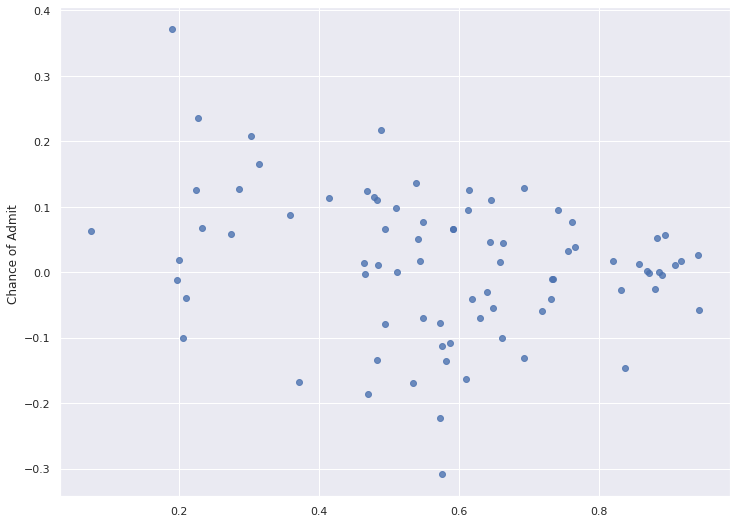

In [193]:
radomtest_residuals=ry_test-ry_pred_test
sns.regplot(x=ry_pred_test,y=radomtest_residuals,scatter=True,fit_reg=False)

In [194]:
radomtest_residuals.describe()


count    80.000000
mean      0.011553
std       0.110316
min      -0.308293
25%      -0.055569
50%       0.015122
75%       0.076463
max       0.371220
Name: Chance of Admit , dtype: float64

Residual plot (plot between predected values and difference between actual values and predicted values) for train data

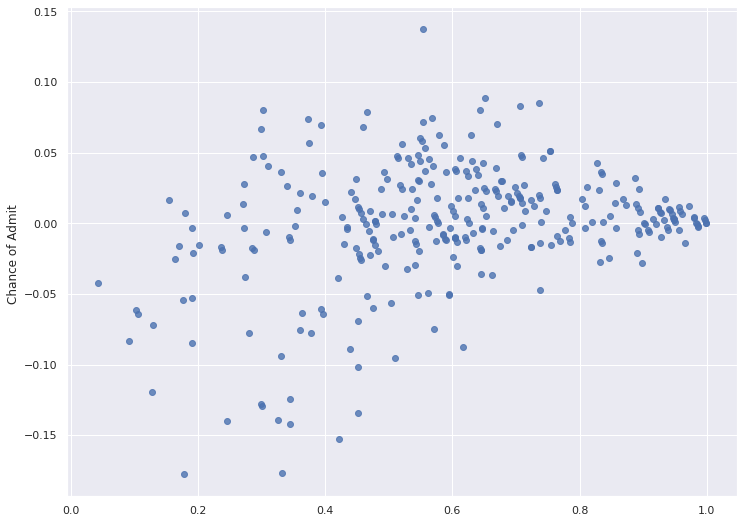

In [195]:
radomtrain_residuals=ry_train-ry_pred_train
sns.regplot(x=ry_pred_train,y=radomtrain_residuals,scatter=True,fit_reg=False)

In [196]:
radomtrain_residuals.describe()

count    320.000000
mean      -0.000326
std        0.043641
min       -0.177398
25%       -0.013862
50%        0.003415
75%        0.023618
max        0.137398
Name: Chance of Admit , dtype: float64

In [197]:
import pickle
# Save the model
filename = 'modelradomforest.pkl'
pickle.dump(randomregressor, open(filename, 'wb'))

In [198]:
adp1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          400 non-null    float64
 1   TOEFL Score        400 non-null    float64
 2   University Rating  400 non-null    float64
 3   SOP                400 non-null    float64
 4   LOR                400 non-null    float64
 5   CGPA               400 non-null    float64
 6   Research           400 non-null    float64
 7   Chance of Admit    400 non-null    float64
dtypes: float64(8)
memory usage: 25.1 KB


In [199]:
adp1.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,0.536150,0.550357,0.521875,0.600000,0.558214,0.572320,0.547500,0.600691
std,0.229473,0.216768,0.285932,0.251717,0.255828,0.192985,0.498362,0.231562
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.360000,0.392857,0.250000,0.375000,0.428571,0.433428,0.000000,0.463415
50%,0.540000,0.535714,0.500000,0.625000,0.571429,0.575880,1.000000,0.609756
75%,0.700000,0.714286,0.750000,0.750000,0.714286,0.722380,1.000000,0.772358
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [200]:
list_of_columns = adp1.columns
input_data=pd.DataFrame(columns=list_of_columns)
input_data.drop(['Chance of Admit '], axis = 1, inplace = True)

In [201]:
adp1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          400 non-null    float64
 1   TOEFL Score        400 non-null    float64
 2   University Rating  400 non-null    float64
 3   SOP                400 non-null    float64
 4   LOR                400 non-null    float64
 5   CGPA               400 non-null    float64
 6   Research           400 non-null    float64
 7   Chance of Admit    400 non-null    float64
dtypes: float64(8)
memory usage: 25.1 KB


In [208]:
input_data.at[0, 'GRE Score'] = float(input('enter GRE Score:'))
input_data.at[0, 'TOEFL Score'] = float(input('enter TOEFL Score:'))
input_data.at[0, 'University Rating'] = float(input('enter University Rating:'))
input_data.at[0, 'SOP'] = float(input('enter SOP Rating:'))
input_data.at[0, 'LOR '] = float(input('enter LORRating:'))
input_data.at[0, 'CGPA'] = float(input('enter CGPA:'))
input_data.at[0, 'Research'] = float(input('enter Research(0 or 1):'))

input_data['GRE Score']=(input_data['GRE Score']-adp1['GRE Score'].min())/(adp1['GRE Score'].max()-adp1['GRE Score'].min())
input_data['TOEFL Score']=(input_data['TOEFL Score']-adp1['TOEFL Score'].min())/(adp1['TOEFL Score'].max()-adp1['TOEFL Score'].min())
input_data['University Rating']=(input_data['University Rating']-adp1['University Rating'].min())/(adp1['University Rating'].max()-adp1['University Rating'].min())
input_data['SOP']=(input_data['SOP']-adp1['SOP'].min())/(adp1['SOP'].max()-adp1['SOP'].min())
input_data['LOR ']=(input_data['LOR ']-adp1['LOR '].min())/(adp1['LOR '].max()-adp1['LOR '].min())
input_data['CGPA']=(input_data['CGPA']-adp1['CGPA'].min())/(adp1['CGPA'].max()-adp1['CGPA'].min())


y_pred =  randomregressor.predict(input_data)
sales=y_pred*(adp1['Chance of Admit '].max()-adp1['Chance of Admit '].min())+adp1['Chance of Admit '].min()
print('Chance of getting admission is ',sales*100,'%')

enter GRE Score:360
enter TOEFL Score:120
enter University Rating:4
enter SOP Rating:1
enter LORRating:1
enter CGPA:5
enter Research(0 or 1):0
Chance of getting admission is  [97.52845528] %
